In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!pip install sentence-transformers
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=5305dc9968fe49c0457579854dc710fdfb5662288b6a49c4dbccf9ba36a11579
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from gensim.models import LdaModel
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from gensim import corpora
import gensim
from tqdm import tqdm
from sklearn.decomposition import LatentDirichletAllocation


In [5]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [6]:
data_path = '/content/drive/MyDrive/IAOS/'

with open(data_path+"cleaned.txt", "r") as file:
    content = file.read()

docs = content.split("---")
docs.pop()
for section in docs:
    print(section.strip())

print(len(docs))

proliferation 5g mobile networks within nextgeneration wireless communication design optimization 5g networks progressing direction improving physical layer security pls paradigm phenomenon due fact traditional methods network optimization pls fail adapt new features technologies resource management diversified demand applications improve methods future 5g beyond 5g b5g networks need rely new enabling technologies therefore approaches pls design optimization based artificial intelligence ai machine learning ml corroborated outperform traditional security technologies allow future 5g networks intelligent robust order significantly improve performance system design traditional security methods objective advancing future pls research review paper presents elaborate discussion design optimization approaches wireless pls techniques particular focus signal processing informationtheoretic security approaches investigate optimization techniques system designs pls strategies review begins funda

In [7]:
data_path = '/content/drive/MyDrive/IAOS/'
abstracts_file_path = data_path+"cleaned.txt"
titles_file_path = data_path+"cleanedTitles.txt"

with open(abstracts_file_path, 'r') as abstracts_file:
    abstracts = abstracts_file.read().split('---')

with open(titles_file_path, 'r') as titles_file:
    titles = titles_file.read().split('---')

titles = [title.strip() for title in titles]

title_abstract_pairs = []
for i, title in enumerate(titles):
    if i < len(abstracts):
        abstract = abstracts[i].strip()
    else:
        abstract = ""  
    if abstract != "null":
        title_abstract_pairs.append((title, abstract))
title_abstract_pairs.pop()
for title, abstract in title_abstract_pairs:
    print("Title:", title)
    print("Abstract:", abstract)

Title: A Review of Fundamental Optimization Approaches and the Role of AI Enabling Technologies in Physical Layer Security
Abstract: proliferation 5g mobile networks within nextgeneration wireless communication design optimization 5g networks progressing direction improving physical layer security pls paradigm phenomenon due fact traditional methods network optimization pls fail adapt new features technologies resource management diversified demand applications improve methods future 5g beyond 5g b5g networks need rely new enabling technologies therefore approaches pls design optimization based artificial intelligence ai machine learning ml corroborated outperform traditional security technologies allow future 5g networks intelligent robust order significantly improve performance system design traditional security methods objective advancing future pls research review paper presents elaborate discussion design optimization approaches wireless pls techniques particular focus signal proc

In [8]:

#vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

sbert_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
sentence_embeddings = sbert_model.encode(docs)

#Como se comprueba si es o no similar
#cosine(sentence_embeddings[0],sbert_model.encode([String])[0])

# compute the cosine similarity matrix
cos_sim_matrix = cosine_similarity(sentence_embeddings)
cos_sim_matrix

array([[ 1.        ,  0.28770787,  0.18130785,  0.38088417,  0.24606183,
         0.35825083, -0.02587825,  0.29881108,  0.27137128,  0.30750424,
         0.34522906,  0.36143297,  0.19802597,  0.32838607,  0.5383759 ,
         0.28119564,  0.31643772,  0.29047328,  0.36055475,  0.35514128,
         0.35810384,  0.4039116 ,  0.20130251,  0.3008764 ,  0.33802745,
         0.15622646,  0.38119304,  0.37330782,  0.35102367,  0.3019426 ],
       [ 0.28770787,  1.0000001 ,  0.12554507,  0.19701497,  0.23713046,
         0.3226139 ,  0.11219243,  0.18678081,  0.16493335,  0.35540667,
         0.41728178,  0.5664286 ,  0.18081973,  0.24814895,  0.43736973,
         0.28924355,  0.22775148,  0.5110663 ,  0.3116546 ,  0.38299966,
         0.1617693 ,  0.32227963,  0.5345821 ,  0.31992483,  0.42326248,
         0.21072412,  0.30935425,  0.3178869 ,  0.1898452 ,  0.33200878],
       [ 0.18130785,  0.12554507,  1.        ,  0.37395436,  0.12510905,
         0.3478986 ,  0.02831648,  0.29180294,  0

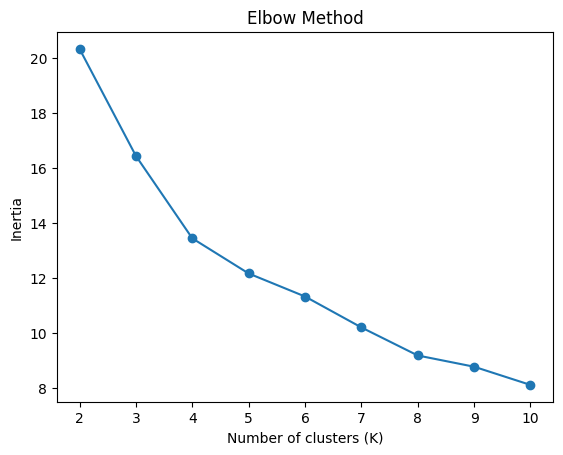

The optimal number of clusters is: 2
                                             document  cluster
0   proliferation 5g mobile networks within nextge...        0
1   \nautomatic summarisation popular approach red...        0
2   \narticle discuss method hand gesture recognit...        0
3   \nconfronting age artificial intelligence expl...        0
4   \ntreattotarget t2t main therapeutic strategy ...        0
5   \nstudy examines current state artificial inte...        0
6                                                \n\n        1
7   \nconstruction industry nondestructive testing...        0
8   \nbuildings one combination systems eg central...        0
9   \nglobal epidemic era oral problems significan...        0
10  \ndominant sequence transduction models based ...        0
11  \nneural machine translation nmt models usuall...        0
12  \nobjectives assess role artificial intelligen...        0
13  \nfundamental basis development novel radiothe...        0
14  \npaper online

In [9]:
#ELBOW METHOD
k_values = range(2, 11)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=33)
    kmeans.fit(cos_sim_matrix)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = np.argmin(np.diff(inertia_values)) + 2
print("The optimal number of clusters is:", optimal_k)

clustering = AgglomerativeClustering(n_clusters=optimal_k, metric='cosine', linkage='complete')
labels = clustering.fit_predict(cos_sim_matrix)

df = pd.DataFrame({'document': docs, 'cluster': labels})
print(df)




The optimal number of clusters is: 2


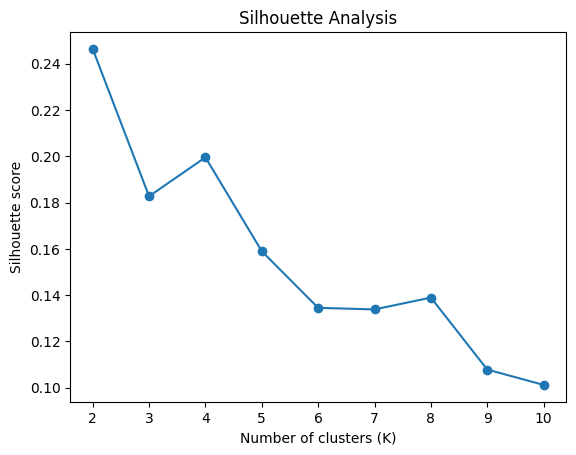

                                             document  cluster
0   proliferation 5g mobile networks within nextge...        0
1   \nautomatic summarisation popular approach red...        0
2   \narticle discuss method hand gesture recognit...        0
3   \nconfronting age artificial intelligence expl...        0
4   \ntreattotarget t2t main therapeutic strategy ...        0
5   \nstudy examines current state artificial inte...        0
6                                                \n\n        1
7   \nconstruction industry nondestructive testing...        0
8   \nbuildings one combination systems eg central...        0
9   \nglobal epidemic era oral problems significan...        0
10  \ndominant sequence transduction models based ...        0
11  \nneural machine translation nmt models usuall...        0
12  \nobjectives assess role artificial intelligen...        0
13  \nfundamental basis development novel radiothe...        0
14  \npaper online deep learning dlbased channel e...  

In [10]:
k_values = range(2, 11)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=33)
    labels = kmeans.fit_predict(cos_sim_matrix)
    score = silhouette_score(cos_sim_matrix, labels)
    silhouette_scores.append(score)

optimal_k = k_values[np.argmax(silhouette_scores)]
print("The optimal number of clusters is:", optimal_k)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis')
plt.show()

clustering = AgglomerativeClustering(n_clusters=optimal_k, metric='cosine', linkage='complete')
labels = clustering.fit_predict(cos_sim_matrix)

df = pd.DataFrame({'document': docs, 'cluster': labels})
print(df)


In [11]:
X = vectorizer.fit_transform(docs)
lda = LatentDirichletAllocation(n_components=6, random_state=0)
lda.fit(X)

LatentDirichletAllocation(n_components=6, random_state=0)

In [12]:
with open(data_path+"Topic_words.txt", 'w') as file:
    feature_names = vectorizer.get_feature_names_out() 
    for topic_id, topic in enumerate(lda.components_):
        topic_probabilities = topic / topic.sum()
        sorted_word_ids = topic_probabilities.argsort()[::-1][:5]
        topic_words = [(feature_names[i], topic_probabilities[i]) for i in sorted_word_ids]
        file.write(f"Topic {topic_id}: {' '.join([feature_names[i] for i in topic.argsort()[:-6:-1]])}\n")
        print(f"Topic {topic_id}: {' '.join([f'{w}: {p:.3f}' for w, p in topic_words])}")
        


Topic 0: models: 0.010 using: 0.008 learning: 0.008 cell: 0.007 artificial: 0.007
Topic 1: system: 0.014 pls: 0.012 optimization: 0.010 design: 0.008 systems: 0.007
Topic 2: network: 0.009 classification: 0.007 system: 0.007 crops: 0.007 smart: 0.007
Topic 3: ai: 0.015 channel: 0.009 systems: 0.008 models: 0.008 results: 0.008
Topic 4: dr: 0.015 training: 0.010 msi: 0.008 intelligence: 0.007 time: 0.007
Topic 5: flare: 0.009 decision: 0.008 attention: 0.007 also: 0.007 treatment: 0.007


In [15]:
with open(data_path+"Title_topic_prob.txt", 'w') as file:
  for title, doc in title_abstract_pairs:
    new_doc_bow = vectorizer.transform([doc])

    topic_distribution = lda.transform(new_doc_bow)

    print("Topic distribution for "+title)
    probs=[]
    for topic_idx, topic_prob in enumerate(topic_distribution[0]):
        probs.append(topic_prob)
        print(f"Topic {topic_idx}: {topic_prob:.2f}")
    max_prob = max(probs)
    max_prob_index = probs.index(max_prob)
    file.write(title+'---'+ str(max_prob)+'---Topic '+str(max_prob_index)+'\n')


Topic distribution for A Review of Fundamental Optimization Approaches and the Role of AI Enabling Technologies in Physical Layer Security
Topic 0: 0.00
Topic 1: 1.00
Topic 2: 0.00
Topic 3: 0.00
Topic 4: 0.00
Topic 5: 0.00
Topic distribution for A Supervised Approach to Extractive Summarisation of Scientific Papers
Topic 0: 0.99
Topic 1: 0.00
Topic 2: 0.00
Topic 3: 0.00
Topic 4: 0.00
Topic 5: 0.00
Topic distribution for Training Gesture-Based-Scroll Visual Artificial Intelligence And Measuring Its Effectiveness Using Hidden-Markov Modeling Methods
Topic 0: 0.00
Topic 1: 0.99
Topic 2: 0.00
Topic 3: 0.00
Topic 4: 0.00
Topic 5: 0.00
Topic distribution for AI-Based Environmental Color System in Achieving Sustainable Urban Development
Topic 0: 0.00
Topic 1: 0.00
Topic 2: 0.00
Topic 3: 0.00
Topic 4: 0.00
Topic 5: 0.99
Topic distribution for An AI-Powered Clinical Decision Support System to Predict Flares in Rheumatoid Arthritis: A Pilot Study
Topic 0: 0.00
Topic 1: 0.00
Topic 2: 0.00
Topic 3

In [ ]:
max_topics =15
tokenized_docs = [doc.split() for doc in docs]

dictionary = gensim.corpora.Dictionary(tokenized_docs)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

coherence_scores = []

for num_topics in tqdm(range(2, max_topics+1)):
  # LDA model
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=100, random_state=42)

  coherence_model = gensim.models.CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
  coherence_score = coherence_model.get_coherence()
  
  coherence_scores.append(coherence_score)
  
optimal_topics = np.argmax(coherence_scores) + 1
print(optimal_topics)

print(coherence_scores)


100%|██████████| 14/14 [00:51<00:00,  3.68s/it]

11
[0.3690072332497323, 0.38726389880594025, 0.3361713035901207, 0.41481570487691527, 0.3538511753030487, 0.3733269277895633, 0.42581435198965806, 0.33468770358151867, 0.4122640828289891, 0.3867956865777765, 0.50820807321411, 0.4231300983507768, 0.5065901225200328, 0.44528380338418777]


In [ ]:
for topic_id, topic_words in lda_model.print_topics(num_words=10):
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.026*"cell" + 0.015*"cells" + 0.015*"candidate" + 0.012*"target" + 0.012*"vocabulary" + 0.012*"lists" + 0.012*"cecile" + 0.009*"assays" + 0.009*"assay" + 0.009*"nmt"
Topic 1: 0.020*"ai" + 0.017*"3" + 0.017*"fps" + 0.017*"applications" + 0.013*"frames" + 0.013*"healthcare" + 0.010*"scroll" + 0.010*"gesture" + 0.010*"efficiency" + 0.010*"effective"
Topic 2: 0.033*"bias" + 0.028*"models" + 0.025*"using" + 0.021*"learning" + 0.017*"machine" + 0.012*"humans" + 0.012*"human" + 0.012*"cognitive" + 0.009*"dataset" + 0.008*"built"
Topic 3: 0.018*"pls" + 0.016*"optimization" + 0.014*"channel" + 0.013*"design" + 0.013*"models" + 0.013*"methods" + 0.011*"ai" + 0.011*"ndt" + 0.009*"results" + 0.009*"strength"
Topic 4: 0.018*"models" + 0.015*"model" + 0.014*"network" + 0.013*"attention" + 0.011*"task" + 0.010*"best" + 0.008*"training" + 0.008*"classification" + 0.008*"transformer" + 0.008*"translation"
Topic 5: 0.013*"smart" + 0.013*"system" + 0.013*"crops" + 0.009*"cryptography" + 0.009*"

In [ ]:
n_docs = X.shape[0]
for i in range(n_docs):
    doc = X[i].tocoo()
    doc_topics = lda_model.get_document_topics([(t, doc.data[j]) for j, t in enumerate(doc.col)], minimum_probability=0)
    top_topic = max(doc_topics, key=lambda x: x[1])
    print(f"Document {i+1}:  Topic {top_topic[0]} Probability: {top_topic[1]:.2f}")

Document 1:  Topic 9 Probability: 0.19
Document 2:  Topic 10 Probability: 0.19
Document 3:  Topic 4 Probability: 0.34
Document 4:  Topic 10 Probability: 0.22
Document 5:  Topic 10 Probability: 0.13
Document 6:  Topic 4 Probability: 0.13
Document 7:  Topic 0 Probability: 0.07
Document 8:  Topic 10 Probability: 0.17
Document 9:  Topic 10 Probability: 0.28
Document 10:  Topic 4 Probability: 0.11
Document 11:  Topic 10 Probability: 0.20
Document 12:  Topic 10 Probability: 0.26
Document 13:  Topic 3 Probability: 0.21
Document 14:  Topic 12 Probability: 0.23
Document 15:  Topic 10 Probability: 0.21
Document 16:  Topic 10 Probability: 0.17
Document 17:  Topic 10 Probability: 0.17
Document 18:  Topic 10 Probability: 0.17
Document 19:  Topic 10 Probability: 0.20
Document 20:  Topic 10 Probability: 0.14
Document 21:  Topic 0 Probability: 0.15
Document 22:  Topic 10 Probability: 0.15
Document 23:  Topic 3 Probability: 0.21
Document 24:  Topic 10 Probability: 0.17
Document 25:  Topic 10 Probabilit